In [1]:
from datasets import load_dataset

/home/kuroro/py_envs/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("Jiann/STORAL")

In [3]:
ds

DatasetDict({
    storal_zh_train: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 3368
    })
    storal_zh_valid: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 420
    })
    storal_zh_test: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 421
    })
    storal_en_train: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 1068
    })
    storal_en_valid: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 355
    })
    storal_en_test: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 356
    })
    storal_en_unlabel: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 819
    })
    storal_zh_unlabel: Dataset({
        features: ['id', 'story', 'moral'],
        num_rows: 14988
    })
})

In [4]:
moral = []
moral += ds["storal_en_train"]
moral += ds["storal_en_test"]
moral += ds["storal_en_valid"]

In [5]:
len(moral)

1779

In [6]:
moral[0]

{'id': 0,
 'story': 'A fox one day spied a beautiful bunch of ripe grapes hanging from a vine trained along the branches of a tree. The grapes seemed ready to burst with juice, and the fox\'s mouth watered as he gazed longingly at them. The bunch hung from a high branch, and the fox had to jump for it. The first time he jumped he missed it by a long way. So he walked off a short distance and took a running leap at it, only to fall short once more. Again and again he tried, but in vain. Now he sat down and looked at the grapes in disgust. "What a fool I am," He said. "Here I am wearing myself out to get a bunch of sour grapes that are not worth gaping for."And off he walked very, very scornfully. ',
 'moral': 'There are many who pretend to despise and belittle that which is beyond their reach. '}

In [7]:
import pandas as pd

In [8]:
data = pd.DataFrame(moral)

In [9]:
import re

def preprocess_text(text):
    text = re.sub('\s+', ' ', text)  # Remove extra spaces
    text = re.sub('\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub('\'', '', text)  # Remove apostrophes
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    return text

data['cleaned_text'] = data["moral"].apply(preprocess_text)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_942438/4093779826.py:4: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)  # Remove extra spaces
/tmp/ipykernel_942438/4093779826.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('\S*@\S*\s?', '', text)  # Remove emails


In [10]:
data['cleaned_text'][0]

'there are many who pretend to despise and belittle that which is beyond their reach  '

In [11]:
import gensim
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Tokenize and remove stopwords
def tokenize(text):
    tokens = gensim.utils.simple_preprocess(text, deacc=True)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

data['tokens'] = data['cleaned_text'].apply(tokenize)

[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
data['tokens'][2]

['kindness', 'never', 'wasted']

In [13]:
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatize(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

data['lemmas'] = data['tokens'].apply(lemmatize)

In [14]:
for x in data['lemmas']:
    if 'honesty' in x:
        print(x)

['honesty', 'good', 'policy']
['honesty', 'value', 'dishonest', 'people', 'lose', 'faith', 'we']
['always', 'honest', 'honesty', 'always', 'reward']
['one', 'get', 'greedy', 'try', 'cheat', 'live', 'life', 'honesty']
['always', 'honest', 'honesty', 'always', 'reward']
['honesty', 'class', 'respect', 'everyone', 'regardless', 'financial', 'social', 'status', 'always', 'good', 'deed', 'give', 'one', 'deserve']
['honesty', 'good', 'policy']
['honesty', 'reward', 'greediness', 'punish', 'therefore', 'greedy', 'cheat', 'other']
['feel', 'disappointed', 'thing', 'do', 'not', 'go', 'way', 'think', 'confidence', 'stay', 'honesty', 'true', 'honesty', 'good', 'policy']
['honesty', 'reward', 'greediness', 'punish', 'greedy', 'cheat', 'other']
['honesty', 'good', 'policy']
['honesty', 'good', 'policy']
['good', 'way', 'encourage', 'honesty', 'create', 'environment', 'honesty', 'generosity', 'since', 'want', 'nothing', 'farth', 'fall', 'greed', 'envy']
['first', 'god', 'send', 'we', 'world', 'live'

In [15]:
data['lemmas'][2]

['kindness', 'never', 'waste']

In [16]:
len(data)

1779

In [17]:
import gensim.corpora as corpora

# Create dictionary and corpus
id2word = corpora.Dictionary(data['lemmas'])
texts = data['lemmas']
corpus = [id2word.doc2bow(text) for text in texts]

In [46]:
corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

In [18]:
texts[56]

['wise', 'shun', 'quack']

In [19]:
corpus [56]

[(97, 1), (207, 1), (208, 1)]

In [20]:
import logging
logging.basicConfig(filename='gensim.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO)

In [36]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=24,
                                            update_every=1,
                                            chunksize=3000,
                                            passes=2000,
                                            per_word_topics=True)

TypeError: LdaModel.__init__() got an unexpected keyword argument 'random_seed'

In [32]:
import re
import matplotlib.pyplot as plt
p = re.compile("(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity")
matches = [p.findall(l) for l in open('gensim.log')]
matches = [m for m in matches if len(m) > 0]
tuples = [t[0] for t in matches]
perplexity = [float(t[1]) for t in tuples]
liklihood = [float(t[0]) for t in tuples]
iter = list(range(0,len(tuples)*10,10))
plt.plot(iter,liklihood,c="black")
plt.ylabel("log liklihood")
plt.xlabel("iteration")
plt.title("Topic Model Convergence")
plt.grid()
plt.savefig("convergence_liklihood.pdf")
plt.close()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_942438/1536512894.py:3: SyntaxWarning: invalid escape sequence '\d'
  p = re.compile("(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity")


In [33]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(np.int64(15), '0.024*"harm" + 0.023*"worth" + 0.021*"thing" + 0.020*"learn" + 0.019*"other" + 0.017*"need" + 0.014*"often" + 0.014*"think" + 0.012*"fear" + 0.010*"misfortune"')
(np.int64(10), '0.040*"work" + 0.030*"without" + 0.030*"hard" + 0.024*"thing" + 0.017*"one" + 0.016*"good" + 0.015*"well" + 0.011*"someone" + 0.011*"dream" + 0.010*"may"')
(np.int64(6), '0.196*"not" + 0.138*"do" + 0.056*"can" + 0.013*"other" + 0.011*"get" + 0.010*"always" + 0.010*"people" + 0.009*"true" + 0.008*"one" + 0.008*"thing"')
(np.int64(19), '0.048*"well" + 0.034*"money" + 0.028*"other" + 0.024*"happiness" + 0.024*"spend" + 0.023*"share" + 0.023*"time" + 0.021*"thing" + 0.020*"treat" + 0.014*"right"')
(np.int64(11), '0.020*"we" + 0.019*"go" + 0.019*"matter" + 0.017*"pride" + 0.016*"person" + 0.014*"advantage" + 0.014*"brave" + 0.013*"time" + 0.012*"word" + 0.012*"easy"')
(np.int64(22), '0.068*"life" + 0.031*"happy" + 0.020*"make" + 0.019*"time" + 0.016*"people" + 0.015*"learn" + 0.014*"give" + 0.013*"li

In [34]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [35]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.015253 -0.083765       1        1  7.879450
22    -0.128247 -0.004888       2        1  7.436607
6      0.106040 -0.206763       3        1  7.191216
8     -0.181717  0.003522       4        1  6.093262
14     0.003033 -0.088827       5        1  6.000768
0     -0.136514 -0.013435       6        1  5.204239
17    -0.092350 -0.081927       7        1  5.100195
10     0.043351  0.024625       8        1  4.396877
12    -0.070949 -0.049653       9        1  4.376834
9      0.082679 -0.094242      10        1  4.242015
20     0.082077  0.116611      11        1  3.977384
19     0.012703  0.001729      12        1  3.801779
1      0.016866  0.026360      13        1  3.527363
21     0.118299  0.041342      14        1  3.503719
13    -0.038235  0.008244      15        1  3.475895
4      0.002818  0.029946      16        1  3.279024
18     0.134354 -0.050436      17        1  3.222861
16    -0.074953 -0.058708      18        1  3.110511
3     -0.013149  0.116190      19        1  3.021457
15     0.076914  0.030003      20        1  2.681247
7      0.085582  0.073533      21        1  2.328988
11    -0.001245  0.098656      22        1  2.157196
5     -0.066978  0.064910      23        1  2.059595
23     0.024365  0.096973      24        1  1.931519, topic_info=          Term        Freq       Total Category  logprob  loglift
101        not  221.000000  221.000000  Default  30.0000  30.0000
280         do  159.000000  159.000000  Default  29.0000  29.0000
86        help  141.000000  141.000000  Default  28.0000  28.0000
99         can   64.000000   64.000000  Default  27.0000  27.0000
11       never  121.000000  121.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
287        get    2.457107   96.918991  Topic24  -4.8167   0.2720
269       find    2.216847   45.263492  Topic24  -4.9195   0.9304
339       know    2.041876   61.928516  Topic24  -5.0018   0.5348
411  happiness    1.801799   46.502104  Topic24  -5.1268   0.6962
317       life    1.696130  214.103488  Topic24  -5.1873  -0.8912

[1573 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2278      3  0.856044      I
470       2  0.046884   able
470       3  0.046884   able
470       4  0.093768   able
470       5  0.093768   able
...     ...       ...    ...
699      19  0.147063  yield
362       4  0.567194    you
362       6  0.141799    you
362       9  0.141799    you
1228      5  0.857999   zone

[3464 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 23, 7, 9, 15, 1, 18, 11, 13, 10, 21, 20, 2, 22, 14, 5, 19, 17, 4, 16, 8, 12, 6, 24])

In [41]:
from gensim.utils import simple_preprocess
processed_data = data['lemmas']
dictionary = id2word
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence score: {coherence_lda}")

/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=942438) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=942438) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=942438) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=942438) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=942438) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/pope

Coherence score: 0.3930716604313694


In [69]:
lda_model.get_document_topics(corpus[10])

[(0, np.float32(0.013889189)),
 (1, np.float32(0.013889189)),
 (2, np.float32(0.013889189)),
 (3, np.float32(0.013889189)),
 (4, np.float32(0.013889189)),
 (5, np.float32(0.013889189)),
 (6, np.float32(0.013889189)),
 (7, np.float32(0.013889189)),
 (8, np.float32(0.6805483)),
 (9, np.float32(0.013889189)),
 (10, np.float32(0.013889189)),
 (11, np.float32(0.013889189)),
 (12, np.float32(0.013889189)),
 (13, np.float32(0.013889189)),
 (14, np.float32(0.013889189)),
 (15, np.float32(0.013889189)),
 (16, np.float32(0.013889189)),
 (17, np.float32(0.013889189)),
 (18, np.float32(0.013889189)),
 (19, np.float32(0.013889189)),
 (20, np.float32(0.013889189)),
 (21, np.float32(0.013889189)),
 (22, np.float32(0.013889189)),
 (23, np.float32(0.013889189))]

In [71]:

moral = []
moral += ds["storal_en_train"]
moral += ds["storal_en_test"]
moral += ds["storal_en_valid"]  

In [73]:
import numpy as np
my_array = np.array(moral)

In [74]:
np.size(my_array)

1779

In [76]:
len(corpus)

1779

In [88]:
tmp

[(0, np.float32(0.013889189)),
 (1, np.float32(0.013889189)),
 (2, np.float32(0.013889189)),
 (3, np.float32(0.013889189)),
 (4, np.float32(0.013889189)),
 (5, np.float32(0.013889189)),
 (6, np.float32(0.013889189)),
 (7, np.float32(0.013889189)),
 (8, np.float32(0.6805483)),
 (9, np.float32(0.013889189)),
 (10, np.float32(0.013889189)),
 (11, np.float32(0.013889189)),
 (12, np.float32(0.013889189)),
 (13, np.float32(0.013889189)),
 (14, np.float32(0.013889189)),
 (15, np.float32(0.013889189)),
 (16, np.float32(0.013889189)),
 (17, np.float32(0.013889189)),
 (18, np.float32(0.013889189)),
 (19, np.float32(0.013889189)),
 (20, np.float32(0.013889189)),
 (21, np.float32(0.013889189)),
 (22, np.float32(0.013889189)),
 (23, np.float32(0.013889189))]

In [86]:
tmp = lda_model.get_document_topics(corpus[10])
h = 0
result = -1
for x in tmp:
    if x[1] > h:
        result = x[0]
        h = x[1]
print(result)

8


In [89]:
topic = []
for i in range(len(corpus)):
    tmp = lda_model.get_document_topics(corpus[i])
    h = 0
    result = -1
    for x in tmp:
        if x[1] > h:
            result = x[0]
            h = x[1]
    topic += [result]

    

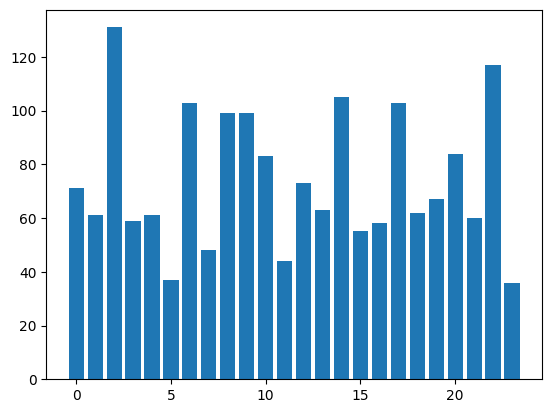

In [96]:
from collections import Counter

some_list = topic

sorted_list = sorted(some_list)
sorted_counted = Counter(sorted_list)

range_length = list(range(max(some_list))) # Get the largest value to get the range.
data_series = {}

for i in range_length:
    data_series[i] = 0 # Initialize series so that we have a template and we just have to fill in the values.

for key, value in sorted_counted.items():
    data_series[key] = value

data_series = pd.Series(data_series)
x_values = data_series.index

# you can customize the limits of the x-axis
# plt.xlim(0, max(some_list))
plt.bar(x_values, data_series.values)

plt.show() 

In [108]:
topic[0]

22

In [112]:
new_data = []

for x in range(len(topic)):
    new_data += [[moral[x]["story"],moral[x]["moral"],topic[x]]]

In [114]:
new_data[1]

['A wolf had been feasting too greedily, and a bone had stuck crosswise in his throat. He could get it neither up nor down, and of course he could not eat a thing. Naturally that was an awful state of affairs for a greedy wolf. So away he hurried to the crane. He was sure that she, with her long neck and bill, would easily be able to reach the bone and pull it out. "I will reward you very handsomely," Said the wolf, "If you pull that bone out for me."The crane, as you can imagine, was very uneasy about putting her head in a wolf\'s throat. But she was grasping in nature, so she did what the wolf asked her to do. When the wolf felt that the bone was gone, he started to walk away. "But what about my reward!" Called the crane anxiously. "What!" Snarled the wolf, whirling around. "Haven\'t you got it? isn\'t it enough that I let you take your head out of my mouth without snapping it off?" ',
 'Expect no reward for serving the wicked. ',
 3]

In [118]:
from operator import itemgetter
new_data_ = sorted(new_data, key=itemgetter(2))

In [119]:
with open('lda_result_1.txt', 'w') as f:
    for line in new_data_:
        f.write(f"{line}\n")